<a href="https://colab.research.google.com/github/yerinsally/BDAA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_1127_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필수과제

- mpg, gaminder 데이터로 loc, iloc 코드를 짜기 (10개 이상)
- 슬라이싱, 변수화 등 다양하게 진행, 주석처리 필수

## 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 5기/data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# gapminder : 국가별 경제 수준과 의료 수준 동향을 정리한 DataSet
gap = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 5기/data/gapminder.tsv',sep = '\t')
gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## 질문 & 답

### 1. mpg 데이터의 2, 20, 200행의 cty, hwy 평균은?

In [ ]:
# mpg의 2, 20, 200행 데이터 추출
mpg_1 = mpg.loc[[2, 20, 200]]
mpg_1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
200,toyota,toyota tacoma 4wd,2.7,1999,4,manual(m5),4,15,20,r,pickup


In [ ]:
mpg_1['cty'].mean()

16.333333333333332

In [ ]:
mpg_1['hwy'].mean()

23.666666666666668

### 2. mpg 데이터 year, category 슬라이싱 후 빈도수가 가장 많은 category를 찾고, 연도별로 나타내기

In [ ]:
# year, category 컬럼 슬라이싱
mpg_2 = mpg.loc[:, ['year', 'category']]
mpg_2

,year,category
0,1999,compact
1,1999,compact
2,2008,compact
3,2008,compact
4,1999,compact
...,...,...
229,2008,midsize
230,2008,midsize
231,1999,midsize
232,1999,midsize


In [ ]:
mpg_2.groupby('category').count()

,year
category,
2seater,5
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62


In [ ]:
# 가장 많은 빈도수 = suv
mpg_2_suv = mpg_2.query('category == "suv"')
mpg_2_suv

,year,category
18,2008,suv
19,2008,suv
20,2008,suv
21,1999,suv
22,2008,suv
...,...,...
176,1999,suv
177,2008,suv
178,2008,suv
198,1999,suv


In [ ]:
mpg_2_suv.value_counts()

year  category
2008  suv         33
1999  suv         29
dtype: int64

### 3. mpg 데이터에서 1~50행 추출하고 cty 평균 가장 높은 manufacturer 구하기

In [ ]:
# range(A, B) : A부터 B-1 까지의 정수 범위를 반환
a = list(range(1,51))
mpg_3 = mpg.loc[a]
mpg_3

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact


In [ ]:
# manufacturer로 그룹화 후 cty 평균 구하기
mpg_3.groupby('manufacturer').agg(mean_cty = ('cty', 'mean'))

,mean_cty
manufacturer,
audi,17.588235
chevrolet,15.000000
dodge,15.428571


audi의 cty 평균이 가장 크다.

### 4. iloc으로 mpg 데이터 중 100~110행의 5번째 열 추출하기

In [ ]:
mpg.iloc[100:111, [0,1,2,3,4]]

,manufacturer,model,displ,year,cyl
100,honda,civic,1.6,1999,4
101,honda,civic,1.6,1999,4
102,honda,civic,1.6,1999,4
103,honda,civic,1.6,1999,4
104,honda,civic,1.8,2008,4
105,honda,civic,1.8,2008,4
106,honda,civic,1.8,2008,4
107,honda,civic,2.0,2008,4
108,hyundai,sonata,2.4,1999,4
109,hyundai,sonata,2.4,1999,4


### 5. gap 데이터의 대륙별 인구 수와 GDP 평균 구하기

In [ ]:
# gap 데이터를 continent으로 그룹화
gap.groupby('continent')['pop'].mean()

continent
Africa      9.916003e+06
Americas    2.450479e+07
Asia        7.703872e+07
Europe      1.716976e+07
Oceania     8.874672e+06
Name: pop, dtype: float64

In [ ]:
gap.groupby('continent')['gdpPercap'].mean()

continent
Africa       2193.754578
Americas     7136.110356
Asia         7902.150428
Europe      14469.475533
Oceania     18621.609223
Name: gdpPercap, dtype: float64

### 6. gap 데이터 1~850행의 기대수명 평균 구하기

In [ ]:
# iloc으로 1~850행 추출
gap_6 = gap.iloc[1:851]
gap_6

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
...,...,...,...,...,...,...
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960


In [ ]:
gap_6['lifeExp'].mean()

59.46122197647058

### 7. gap 데이터 내 대한민국의 기대수명, 인구, GDP 컬럼만 추출하여 평균 구하기

In [ ]:
# country = Korea, Rep. 데이터 추출
gap_7 = gap.query('country == "Korea, Rep."')
gap_7

,country,continent,year,lifeExp,pop,gdpPercap
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960


In [ ]:
gap_7_new = gap_7.loc[:, ['lifeExp','pop','gdpPercap']]
gap_7_new

,lifeExp,pop,gdpPercap
840,47.453,20947571,1030.592226
841,52.681,22611552,1487.593537
842,55.292,26420307,1536.344387
843,57.716,30131000,2029.228142
844,62.612,33505000,3030.876650
845,64.766,36436000,4657.221020
846,67.123,39326000,5622.942464
847,69.810,41622000,8533.088805
848,72.244,43805450,12104.278720
849,74.647,46173816,15993.527960


In [ ]:
gap_7_new['lifeExp'].mean()

65.001

In [ ]:
gap_7_new['pop'].mean()

36499386.333333336

In [ ]:
gap_7_new['gdpPercap'].mean()

8217.318485083333

### 8. 대륙을 기준으로 연도별 기대수명과 인구 평균 구하기

In [ ]:
gap.groupby(['continent', 'year'])[['lifeExp', 'pop']].mean()

lifeExp           pop
continent year                         
Africa    1952  39.135500  4.570010e+06
          1957  41.266346  5.093033e+06
          1962  43.319442  5.702247e+06
          1967  45.334538  6.447875e+06
          1972  47.450942  7.305376e+06
          1977  49.580423  8.328097e+06
          1982  51.592865  9.602857e+06
          1987  53.344788  1.105450e+07
          1992  53.629577  1.267464e+07
          1997  53.598269  1.430448e+07
          2002  53.325231  1.603315e+07
          2007  54.806038  1.787576e+07
Americas  1952  53.279840  1.380610e+07
          1957  55.960280  1.547816e+07
          1962  58.398760  1.733081e+07
          1967  60.410920  1.922986e+07
          1972  62.394920  2.117537e+07
          1977  64.391560  2.312271e+07
          1982  66.228840  2.521164e+07
          1987  68.090720  2.731016e+07
          1992  69.568360  2.957096e+07
          1997  71.150480  3.187602e+07
          2002  72.422040  3.399091e+07
          2007  73.608120  3.595485e+07
Asia      1952  46.314394  4.228356e+07
          1957  49.318544  4.735699e+07
          1962  51.563223  5.140476e+07
          1967  54.663640  5.774736e+07
          1972  57.319269  6.518098e+07
          1977  59.610556  7.225799e+07
          1982  62.617939  7.909502e+07
          1987  64.851182  8.700669e+07
          1992  66.537212  9.494825e+07
          1997  68.020515  1.025238e+08
          2002  69.233879  1.091455e+08
          2007  70.728485  1.155138e+08
Europe    1952  64.408500  1.393736e+07
          1957  66.703067  1.459635e+07
          1962  68.539233  1.534517e+07
          1967  69.737600  1.603930e+07
          1972  70.775033  1.668784e+07
          1977  71.937767  1.723882e+07
          1982  72.806400  1.770890e+07
          1987  73.642167  1.810314e+07
          1992  74.440100  1.860476e+07
          1997  75.505167  1.896480e+07
          2002  76.700600  1.927413e+07
          2007  77.648600  1.953662e+07
Oceania   1952  69.255000  5.343003e+06
          1957  70.295000  5.970988e+06
          1962  71.085000  6.641759e+06
          1967  71.310000  7.300207e+06
          1972  71.910000  8.053050e+06
          1977  72.855000  8.619500e+06
          1982  74.290000  9.197425e+06
          1987  75.320000  9.787208e+06
          1992  76.945000  1.045983e+07
          1997  78.190000  1.112072e+07
          2002  79.740000  1.172741e+07
          2007  80.719500  1.227497e+07

### 9. gap 데이터 10의 배수인 행 추출하기

In [ ]:
# range(A, B, C) : A부터 C 숫자만큼의 간격으로 B-1 까지의 정수 범위를 반환
aa = list(range(10,1704,10))
gap.loc[aa]

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
20,Albania,Europe,1992,71.581,3326498,2497.437901
30,Algeria,Africa,1982,61.368,20033753,5745.160213
40,Angola,Africa,1972,37.928,5894858,5473.288005
50,Argentina,Americas,1962,65.142,21283783,7133.166023
...,...,...,...,...,...,...
1660,West Bank and Gaza,Asia,1972,56.532,1089572,3133.409277
1670,"Yemen, Rep.",Asia,1962,35.180,6120081,825.623201
1680,Zambia,Africa,1952,42.038,2672000,1147.388831
1690,Zambia,Africa,2002,39.193,10595811,1071.613938


### 10. 9번 데이터에서 연도별 GDP 평균 구해서 시각화하기

In [ ]:
# 새로운 데이터프레임으로 저장하기
aa = list(range(10,1704,10))
gap_9 = gap.loc[aa]
gap_9

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
20,Albania,Europe,1992,71.581,3326498,2497.437901
30,Algeria,Africa,1982,61.368,20033753,5745.160213
40,Angola,Africa,1972,37.928,5894858,5473.288005
50,Argentina,Americas,1962,65.142,21283783,7133.166023
...,...,...,...,...,...,...
1660,West Bank and Gaza,Asia,1972,56.532,1089572,3133.409277
1670,"Yemen, Rep.",Asia,1962,35.180,6120081,825.623201
1680,Zambia,Africa,1952,42.038,2672000,1147.388831
1690,Zambia,Africa,2002,39.193,10595811,1071.613938


In [ ]:
# year를 기준으로 그룹화하여 데이터 추출
gap_10 = gap_9.groupby('year')['gdpPercap'].mean()
gap_10

year
1952     3406.660765
1962     4748.702925
1972     5608.938365
1982     6292.159722
1992     7245.023025
2002    11752.538875
Name: gdpPercap, dtype: float64

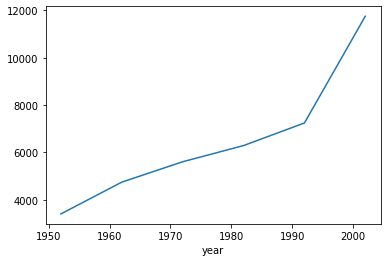

In [ ]:
# 시각화
import matplotlib.pyplot as plt
gap_10.plot()